# KNN Classification ("Titanic")

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import warnings
warnings.filterwarnings('ignore')

os.getcwd()
os.chdir("F:\Read_data")

In [98]:
data =pd.read_csv("data_cleaned.csv")

In [99]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [100]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [101]:
# seggregating dependent and independent variables
x = data.drop('Survived',axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

##    Scaling the data using the minmax scaler

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [103]:
x =pd.DataFrame(x_scaled , columns = x.columns)

In [104]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [105]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y = tts(x,y, random_state = 56 ,stratify= y)

# Implementing KNN Classifier

In [115]:
from sklearn.neighbors import KNeighborsClassifier as KNN            #KNN is a class
from sklearn.metrics import f1_score                                 # as it offers multiple functions

In [148]:
# creating instance of KNN
clf = KNN(n_neighbors = 27)
 
# Fitting the model                               used to train the model
clf.fit(train_x,train_y)

# Predicting over the Train set and calculating F1

test_predict = clf.predict(test_x)              # takes the value of test_x to predict test_y
k = f1_score(test_predict,test_y)               # comparing our predictions with the original test_y
print("Test F1 score " ,k)

Test F1 score  0.751592356687898


In [149]:
test_predict.shape ,test_y.shape,test_x.shape

((223,), (223,), (223, 24))

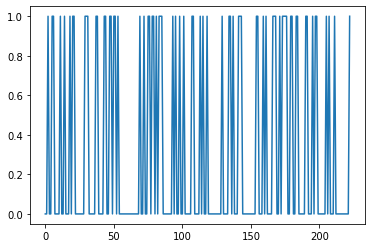

In [150]:
# plotting test_predict and test_y

plt.plot(test_predict)

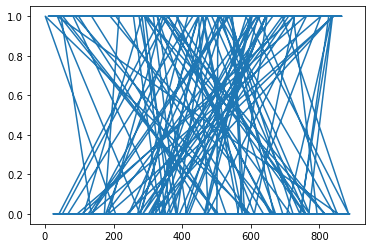

In [151]:
plt.plot(test_y)

## Elbow for classifier

In [152]:
def Elbow(k):
    # initialising empty list
    test_error =[]
    
    #training model for every value of k
    
    for i in k:
        # Instance of KNN
        clf =KNN(n_neighbors= i)
        clf.fit(train_x,train_y)
        
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)   # high f1_score is better model
        error = 1-tmp                             # here taking error therefore 1-f1_score
        test_error.append(error)
        
    return test_error

In [153]:
# defining k range
k= range(1,30,2)

In [154]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow curve for k')

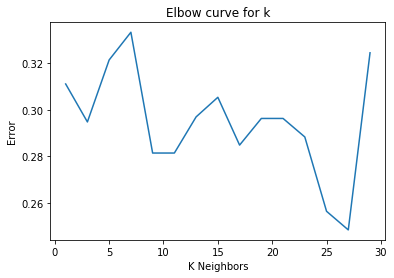

In [144]:
plt.plot(k,test)
plt.xlabel("K Neighbors")
plt.ylabel("Error")
plt.title("Elbow curve for k")

In [155]:
# therefore error is minimum for k 12,14  for range(6,20,2)
# else k = 27

In [157]:
#again creating an instance
clf =KNN(n_neighbors=27)             # 27 is the k value here
clf.fit(train_x,train_y)

predicted=clf.predict(test_x)               # predicted test_y
test_score=f1_score(predicted,test_y)
test_score

0.751592356687898

## Got the optimum value of k as 27

# ===================================================== 

# Now for Regresion type problem ("Big mart sales")